<a href="https://colab.research.google.com/github/CE334/CE334_230639_Mayank_Agrawal/blob/main/CE334_MayankAgrawal_230639_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab 3 - Gravity Network

libraries import

In [64]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [65]:
np.set_printoptions(
    precision=4,
    suppress=True,
    linewidth=120
)

# Ques 1

data file and columns from data

In [66]:
fpath = '/content/G1_AMS_Gravity_Survey.csv'
print('\n read data and convert time')

# read csv
gdf = pd.read_csv(fpath)
display(gdf)


 read data and convert time


,Station,Date,Time,CorrGrav,Line,StdDev,StdErr,RawGrav,X,Y,...,DriftCorr,MeasurDur,InstrHeight,LatUser,LonUser,ElevUser,LatGPS,LonGPS,ElevGPS,Corrections[drift-temp-na-tide-tilt]
0,GF_01,2006-06-07,09:45:40,2938.8852,0,0.0079,0.0014,2920.7902,4.3,-4.5,...,18.4178,30,0.0,26.515779,80.230446,104.5,26.515699,80.230461,103.0,11011
1,GF_01,2006-06-07,09:46:10,2938.8844,0,0.0155,0.0028,2920.7898,4.4,-3.6,...,18.4178,30,0.0,26.515779,80.230446,104.5,26.515690,80.230461,102.7,11011
2,GF_01,2006-06-07,09:46:40,2938.8875,0,0.0096,0.0018,2920.7933,4.5,-3.8,...,18.4178,30,0.0,26.515779,80.230446,104.5,26.515715,80.230446,102.2,11011
3,GF_21,2006-06-07,09:55:02,2936.9117,0,0.0222,0.0041,2918.8198,-7.9,3.5,...,18.4178,30,0.0,26.515671,80.230431,109.7,26.515686,80.230461,108.5,11011
4,GF_21,2006-06-07,09:55:32,2936.9137,0,0.0123,0.0023,2918.8217,-9.1,4.0,...,18.4178,30,0.0,26.515671,80.230431,109.7,26.515734,80.230431,108.8,11011
5,GF_21,2006-06-07,09:56:02,2936.9125,0,0.0123,0.0022,2918.8209,-8.6,3.7,...,18.4178,30,0.0,26.515671,80.230431,109.7,26.515709,80.230431,108.0,11011
6,GF_02,2006-06-07,09:59:49,2938.8950,0,0.0119,0.0022,2920.8044,4.0,5.7,...,18.4178,30,0.0,26.515934,80.230469,108.5,26.515820,80.230499,108.7,11011
7,GF_02,2006-06-07,10:00:19,2938.8946,0,0.0085,0.0016,2920.8039,4.2,7.6,...,18.4178,30,0.0,26.515934,80.230469,108.5,26.515820,80.230499,108.4,11011
8,GF_02,2006-06-07,10:00:49,2938.8959,0,0.0095,0.0017,2920.8053,4.3,7.6,...,18.4178,30,0.0,26.515934,80.230469,108.5,26.515820,80.230507,108.1,11011
9,GF_22,2006-06-07,10:05:27,2936.9168,0,0.0113,0.0021,2918.8281,1.0,-0.7,...,18.4178,30,0.0,26.515800,80.230484,108.1,26.515789,80.230484,107.6,11011


## Ques 2

 convert time with explicit format to avoid warning or next steps issues

In [67]:
# convert time with explicit format to avoid warning or next steps issues
gdf['Time'] = pd.to_datetime(
    gdf['Time'],
    format='%H:%M:%S',
    errors='coerce'
).dt.time

# convert time to decimal hours
def to_dec(t):
    return t.hour + t.minute/60 + t.second/3600

gdf['tdec'] = gdf['Time'].apply(to_dec)

print(gdf.head())

  Station        Date      Time   CorrGrav  Line  StdDev  StdErr    RawGrav  \
0   GF_01  2006-06-07  09:45:40  2938.8852     0  0.0079  0.0014  2920.7902   
1   GF_01  2006-06-07  09:46:10  2938.8844     0  0.0155  0.0028  2920.7898   
2   GF_01  2006-06-07  09:46:40  2938.8875     0  0.0096  0.0018  2920.7933   
3   GF_21  2006-06-07  09:55:02  2936.9117     0  0.0222  0.0041  2918.8198   
4   GF_21  2006-06-07  09:55:32  2936.9137     0  0.0123  0.0023  2918.8217   

     X    Y  ...  MeasurDur  InstrHeight    LatUser    LonUser  ElevUser  \
0  4.3 -4.5  ...         30          0.0  26.515779  80.230446     104.5   
1  4.4 -3.6  ...         30          0.0  26.515779  80.230446     104.5   
2  4.5 -3.8  ...         30          0.0  26.515779  80.230446     104.5   
3 -7.9  3.5  ...         30          0.0  26.515671  80.230431     109.7   
4 -9.1  4.0  ...         30          0.0  26.515671  80.230431     109.7   

      LatGPS     LonGPS  ElevGPS  Corrections[drift-temp-na-tide-til

averaging 3 readings per station

In [68]:
print("averaging 3 readings per station")
print()

avg = gdf.groupby('Station').agg({
    'tdec': 'mean',
    'CorrGrav': 'mean',
    'StdDev': 'mean'
}).sort_index().reset_index()

print(avg[['Station', 'tdec', 'CorrGrav', 'StdDev']])

averaging 3 readings per station

  Station       tdec     CorrGrav    StdDev
0   GF_01   9.769444  2938.885700  0.011000
1   GF_02  10.005278  2938.895167  0.009967
2   GF_21   9.925556  2936.912633  0.015600
3   GF_22  10.099167  2936.914200  0.012067
4   GF_23  10.260556  2936.916667  0.015733
5   GF_41  10.170278  2934.755133  0.014233
6   GF_42  10.352222  2934.763033  0.013233
7   GF_43  10.522222  2934.764067  0.010533
8   GF_61  10.424722  2932.572333  0.012267
9   GF_62  10.602500  2932.578800  0.018467


observation vector wrt reference
b vector and dt vector

In [69]:
# Observation vector taking GF_01 reference
print('form observation vector wrt reference\n')

t_ref = avg.loc[0, 'tdec']
g_ref = avg.loc[0, 'CorrGrav']

b = avg['CorrGrav'].values[1:] - g_ref
dt = avg['tdec'].values[1:] - t_ref

print('reference station:', avg.loc[0, 'Station'])

print('\nb vector (Δg) as column:')
print(b.reshape(-1, 1))

print('\ndt vector (Δt) as column:')
print(dt.reshape(-1, 1))


form observation vector wrt reference

reference station: GF_01

b vector (Δg) as column:
[[ 0.0095]
 [-1.9731]
 [-1.9715]
 [-1.969 ]
 [-4.1306]
 [-4.1227]
 [-4.1216]
 [-6.3134]
 [-6.3069]]

dt vector (Δt) as column:
[[0.2358]
 [0.1561]
 [0.3297]
 [0.4911]
 [0.4008]
 [0.5828]
 [0.7528]
 [0.6553]
 [0.8331]]


calculating design matrix

In [70]:
#calculating design matrix
nobs = len(b)
M = np.zeros((nobs, 4))
sts = avg['Station'].values[1:]

for i, s in enumerate(sts):
    if s in ['GF_21', 'GF_22', 'GF_23']:
        M[i, 0] = 1
    elif s in ['GF_41', 'GF_42', 'GF_43']:
        M[i, 1] = 1
    elif s in ['GF_61', 'GF_62']:
        M[i, 2] = 1

M[:, 3] = dt  # drift column

print('design matrix M: ')
print()
print(M)

design matrix M: 

[[0.     0.     0.     0.2358]
 [1.     0.     0.     0.1561]
 [1.     0.     0.     0.3297]
 [1.     0.     0.     0.4911]
 [0.     1.     0.     0.4008]
 [0.     1.     0.     0.5828]
 [0.     1.     0.     0.7528]
 [0.     0.     1.     0.6553]
 [0.     0.     1.     0.8331]]


Variance Propagation calaculation and co-variance matrix

In [71]:
# Variance Propagation calaculation
print('variance propagation\n')

std_ind = avg['StdDev'].values[1:]
var_m = (std_ind**2) / 3

# Variance vector as DataFrame
var_df = pd.DataFrame(
    var_m,
    index=avg['Station'].values[1:],
    columns=['Variance of Mean']
)

# Covariance matrix as DataFrame
Sbb = np.diag(var_m)
Sbb_df = pd.DataFrame(
    Sbb,
    index=avg['Station'].values[1:],
    columns=avg['Station'].values[1:]
)

print('variance of mean:')
print(var_df)

print('\ncovariance matrix Sbb:')
print(Sbb_df)



variance propagation

variance of mean:
       Variance of Mean
GF_02          0.000033
GF_21          0.000081
GF_22          0.000049
GF_23          0.000083
GF_41          0.000068
GF_42          0.000058
GF_43          0.000037
GF_61          0.000050
GF_62          0.000114

covariance matrix Sbb:
          GF_02     GF_21     GF_22     GF_23     GF_41     GF_42     GF_43  \
GF_02  0.000033  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
GF_21  0.000000  0.000081  0.000000  0.000000  0.000000  0.000000  0.000000   
GF_22  0.000000  0.000000  0.000049  0.000000  0.000000  0.000000  0.000000   
GF_23  0.000000  0.000000  0.000000  0.000083  0.000000  0.000000  0.000000   
GF_41  0.000000  0.000000  0.000000  0.000000  0.000068  0.000000  0.000000   
GF_42  0.000000  0.000000  0.000000  0.000000  0.000000  0.000058  0.000000   
GF_43  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000037   
GF_61  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000

#Ques 3

Weight matrix using std deviation of individual measurements

In [72]:
# weight matrix
W = np.diag(1 / var_m)

print('weight matrix W: \n')
print(W)

weight matrix W: 

[[30201.0045     0.         0.         0.         0.         0.         0.         0.         0.    ]
 [    0.     12327.4162     0.         0.         0.         0.         0.         0.         0.    ]
 [    0.         0.     20603.7667     0.         0.         0.         0.         0.         0.    ]
 [    0.         0.         0.     12119.3623     0.         0.         0.         0.         0.    ]
 [    0.         0.         0.         0.     14808.3958     0.         0.         0.         0.    ]
 [    0.         0.         0.         0.         0.     17131.0014     0.         0.         0.    ]
 [    0.         0.         0.         0.         0.         0.     27038.9361     0.         0.    ]
 [    0.         0.         0.         0.         0.         0.         0.     19937.3819     0.    ]
 [    0.         0.         0.         0.         0.         0.         0.         0.      8797.1953]]


normal matrix N and vector u

In [73]:
# normal equations

N = M.T @ W @ M
u = M.T @ W @ b

print('normal matrix N:\n')
print(N)
print()
print('vector u:')
print()
print(u)

normal matrix N:

[[45050.5451     0.         0.     14669.9198]
 [    0.     58978.3333     0.     36273.5758]
 [    0.         0.     28734.5772 20393.0757]
 [14669.9198 36273.5758 20393.0757 45328.8549]]

vector u:

[ -88806.5682 -243237.0548 -181355.0332 -307113.9492]


estimated parameter and its co-variance matrix

In [74]:
# least squares solution

Ninv = np.linalg.inv(N)
x_hat = Ninv @ u

l_hat = M @ x_hat
v = l_hat - b

n = len(b)
u_p = len(x_hat)   # renamed (important fix)
r = n - u_p

sigma0_sq = (v.T @ W @ v) / r
Sx = sigma0_sq * Ninv

print('estimated parameters [dg2 dg4 dg6 drift]:')
print(x_hat)
print()
print('parameter covariance matrix:')
print(Sx)

estimated parameters [dg2 dg4 dg6 drift]:
[-1.9809 -4.1424 -6.3324  0.0296]

parameter covariance matrix:
[[ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [-0. -0. -0.  0.]]


residuals and adjusted obs

In [75]:
# residuals and adjusted obs

print('adjusted observations:')
print(l_hat)
print()
print('residual vector V:')
print(v)
print()
VTPV = v.T @ W @ v
print('V^T W V:', VTPV)

adjusted observations:
[ 0.007  -1.9763 -1.9711 -1.9664 -4.1305 -4.1251 -4.1201 -6.313  -6.3077]

residual vector V:
[-0.0025 -0.0032  0.0004  0.0027  0.0001 -0.0025  0.0015  0.0004 -0.0008]

V^T W V: 0.5795250207214241


# Ques 4


a priori reference variance, a posteriori reference variance,

No. of observations(n), the number of parameters(u) and redundancy(r)
variance analysis and variance-covariance details


In [76]:
# variance analysis and variance-covariance details

print('\n 1) statistical numbers')

# n, u, r already defined earlier but printing clearly
print('number of observations (n) =', n)
print('number of parameters (u)   =', u_p)
print('redundancy (r = n - u)     =', r)
print('condition number:', np.linalg.cond(N))

print('\n 2) reference variance factors')

# a priori reference variance (assumed)
# (σ0^2 = 1)
sigma0_apri = 1.0

# a posteriori reference variance
# (σ̂0^2 = v^T W v / r)
vTv = float(v.T @ W @ v)
sigma0_post = vTv / r

ratio = sigma0_post / sigma0_apri

print('formula used:')
print('σ̂0² = (vᵀ W v) / (n - u)')
print('\ncalculated values:')
print('a priori reference variance (σ0²)      =', sigma0_apri)
print('a posteriori reference variance (σ̂0²) =', sigma0_post)
print('variance ratio (σ̂0² / σ0²)            =', ratio)

if ratio < 1:
    print('interpretation: model seems slightly overfitted (ratio < 1)')
else:
    print('interpretation: noise level higher than assumed (ratio >= 1)')



 1) statistical numbers
number of observations (n) = 9
number of parameters (u)   = 4
redundancy (r = n - u)     = 5
condition number: 50.77850947701536

 2) reference variance factors
formula used:
σ̂0² = (vᵀ W v) / (n - u)

calculated values:
a priori reference variance (σ0²)      = 1.0
a posteriori reference variance (σ̂0²) = 0.11590500414428481
variance ratio (σ̂0² / σ0²)            = 0.11590500414428481
interpretation: model seems slightly overfitted (ratio < 1)


# Ques 5

variance-covariance of estimated parameters

covariance matrix

standard deviations of paramaters

colrelation matrix of parameters

Consistency checks:
1. orthogonality
2.  VᵀWV consistency
3. variance ratio
4. normal matrix condition no.


In [77]:
print('3) variance-covariance of estimated parameters')

# covariance matrix of parameters
# (Σ_xx = σ̂0² * N⁻¹)
Sxx = sigma0_post * Ninv

print('formula used:')
print('Σ_xx = σ̂0² * (N⁻¹)\n')

print('variance-covariance matrix of parameters:')
print(Sxx)

print('\nstandard deviations of parameters (sqrt of diagonal):')
std_param = np.sqrt(np.diag(Sxx))
param_names = ['Δg2', 'Δg4', 'Δg6', 'drift']

for i in range(len(param_names)):
    print(param_names[i], '=', x_hat[i], '+/-', std_param[i])

print('\n 4) correlation matrix of parameters')

# correlation matrix
corr = np.zeros_like(Sxx)

for i in range(len(Sxx)):
    for j in range(len(Sxx)):
        corr[i,j] = Sxx[i,j] / (std_param[i]*std_param[j])

print('correlation matrix:')
print(corr)

print('\n 5) consistency checks')
print('-------------------------')
# check 1: orthogonality
# (Aᵀ W v ≈ 0)
AtWv = M.T @ W @ v
max_ortho = np.max(np.abs(AtWv))

print('\ncheck 1: orthogonality condition (Aᵀ W v ≈ 0)')
print('Aᵀ W v =')
print(AtWv)
print('maximum absolute value =', max_ortho)

if max_ortho < 1e-8:
    print('status: PASSED')
else:
    print('status: needs inspection')

print('-------------------------')
# check 2: VᵀWV consistency (3 equations)

method1 = vTv
method2 = float(-v.T @ W @ b)
method3 = float(-(u.T @ x_hat) + (b.T @ W @ b))

print('\ncheck 2: Vᵀ W V consistency (3 ways)')
print('method 1 (direct)        =', method1)
print('method 2 (-vᵀ W b)       =', method2)
print('method 3 (normal eqn)    =', method3)

print('difference 1-2 =', abs(method1-method2))
print('difference 1-3 =', abs(method1-method3))

print('-------------------------')
# check 3: variance ratio test
print('\ncheck 3: variance ratio test')
print('σ̂0² / σ0² =', ratio)
print('--------------------------')
# check 4: condition number
condN = np.linalg.cond(N)
print('\ncheck 4: normal matrix condition number')
print('cond(N) =', condN)

if condN < 1e6:
    print('matrix is numerically stable')
else:
    print('warning: matrix may be ill-conditioned')


print('\nall required statistical quantities computed successfully')


3) variance-covariance of estimated parameters
formula used:
Σ_xx = σ̂0² * (N⁻¹)

variance-covariance matrix of parameters:
[[ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [-0. -0. -0.  0.]]

standard deviations of parameters (sqrt of diagonal):
Δg2 = -1.980903605360968 +/- 0.002415225821775154
Δg4 = -4.142380986313672 +/- 0.003687350414301493
Δg6 = -6.33239363080278 +/- 0.004418308040492377
drift = 0.02959927711027177 +/- 0.005545197224026415

 4) correlation matrix of parameters
correlation matrix:
[[ 1.      0.6915  0.6659 -0.7476]
 [ 0.6915  1.      0.8238 -0.9249]
 [ 0.6659  0.8238  1.     -0.8907]
 [-0.7476 -0.9249 -0.8907  1.    ]]

 5) consistency checks
-------------------------

check 1: orthogonality condition (Aᵀ W v ≈ 0)
Aᵀ W v =
[ 0.  0. -0.  0.]
maximum absolute value = 3.1962343882696587e-10
status: PASSED
-------------------------

check 2: Vᵀ W V consistency (3 ways)
method 1 (direct)        = 0.5795250207214241
method 2 (-vᵀ W b)       = 0.5795250217450629


Final adjusted gravity values

In [78]:
#final adjusted gravity values

g0 = g_ref
g2 = g_ref + x_hat[0]
g4 = g_ref + x_hat[1]
g6 = g_ref + x_hat[2]

out = pd.DataFrame({
    'Floor': ['Ground', 'Second', 'Fourth', 'Sixth'],
    'Adj_gravity_mGal': [g0, g2, g4, g6],
    'Std_error': [0, np.sqrt(Sx[0,0]), np.sqrt(Sx[1,1]), np.sqrt(Sx[2,2])]
})

print(out)
print('\nEstimated drift (mGal/hr):', x_hat[3])

    Floor  Adj_gravity_mGal  Std_error
0  Ground       2938.885700   0.000000
1  Second       2936.904796   0.002415
2  Fourth       2934.743319   0.003687
3   Sixth       2932.553306   0.004418

Estimated drift (mGal/hr): 0.02959927711027177


Bonus : Visulaization plots for better understanding

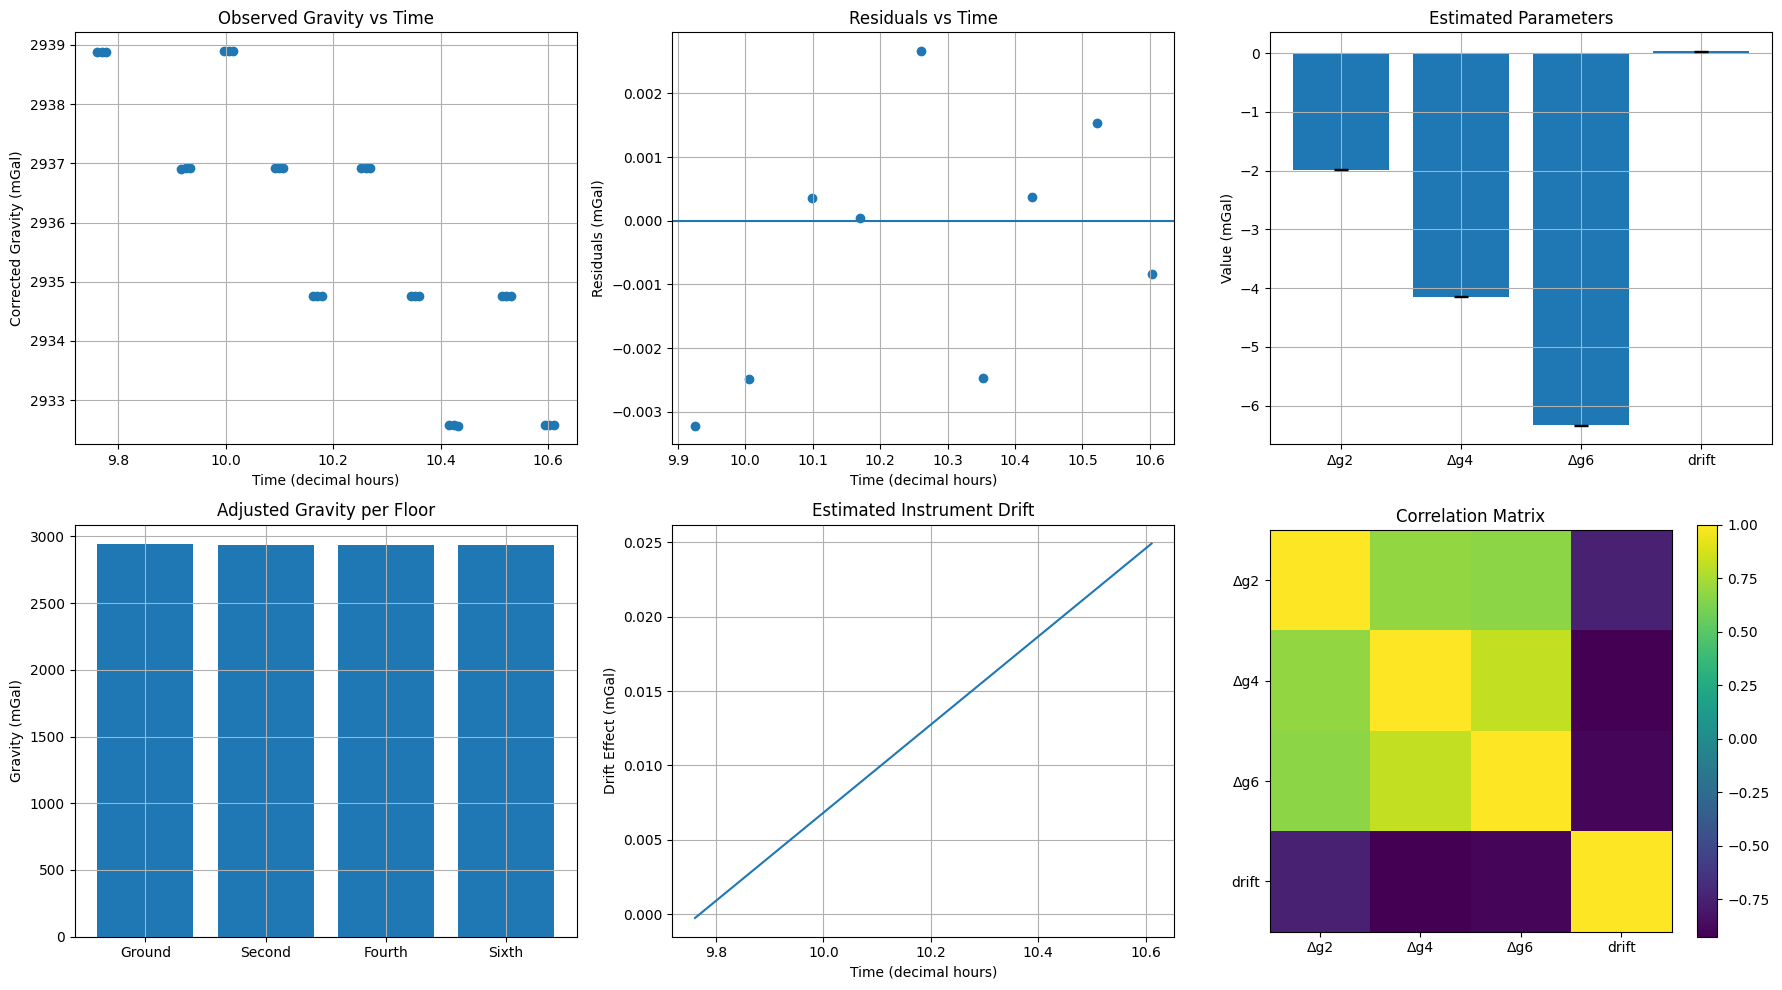

In [82]:
# 3*2 Visulaization plots

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# 1. Observed Gravity vs Time
axs[0, 0].scatter(gdf['tdec'], gdf['CorrGrav'])
axs[0, 0].set_title('Observed Gravity vs Time')
axs[0, 0].set_xlabel('Time (decimal hours)')
axs[0, 0].set_ylabel('Corrected Gravity (mGal)')
axs[0, 0].grid(True)


# 2. Residuals vs Time
axs[0, 1].scatter(dt + t_ref, v)
axs[0, 1].axhline(0)
axs[0, 1].set_title('Residuals vs Time')
axs[0, 1].set_xlabel('Time (decimal hours)')
axs[0, 1].set_ylabel('Residuals (mGal)')
axs[0, 1].grid(True)


# 3. Estimated Parameters with Std Dev
axs[0, 2].bar(param_names, x_hat, yerr=std_param, capsize=5)
axs[0, 2].set_title('Estimated Parameters')
axs[0, 2].set_ylabel('Value (mGal)')
axs[0, 2].grid(True)


# 4. Final Adjusted Gravity per Floor
axs[1, 0].bar(out['Floor'], out['Adj_gravity_mGal'])
axs[1, 0].set_title('Adjusted Gravity per Floor')
axs[1, 0].set_ylabel('Gravity (mGal)')
axs[1, 0].grid(True)


# 5. Estimated Drift Line
time_line = np.linspace(min(gdf['tdec']), max(gdf['tdec']), 100)
drift_line = x_hat[3] * (time_line - t_ref)

axs[1, 1].plot(time_line, drift_line)
axs[1, 1].set_title('Estimated Instrument Drift')
axs[1, 1].set_xlabel('Time (decimal hours)')
axs[1, 1].set_ylabel('Drift Effect (mGal)')
axs[1, 1].grid(True)


# 6. Correlation Matrix
im = axs[1, 2].imshow(corr)
axs[1, 2].set_title('Correlation Matrix')
axs[1, 2].set_xticks(range(len(param_names)))
axs[1, 2].set_yticks(range(len(param_names)))
axs[1, 2].set_xticklabels(param_names)
axs[1, 2].set_yticklabels(param_names)

fig.colorbar(im, ax=axs[1, 2])

plt.tight_layout()
plt.show()
